In [2]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# MPC import
import numpy as np
from Deliverable_3_1.LinearMPC.MPCVelControl import MPCVelControl 
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis,plot_static_states_inputs


rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 25 iterations.
Simulating time 0.00: 

c:\Users\tomso\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

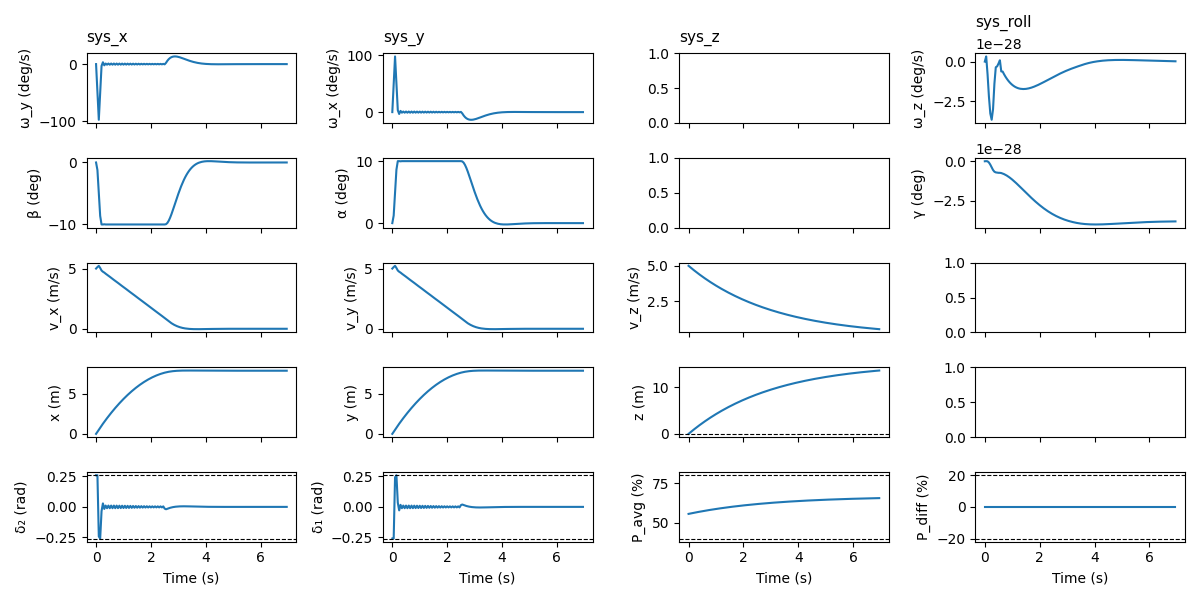

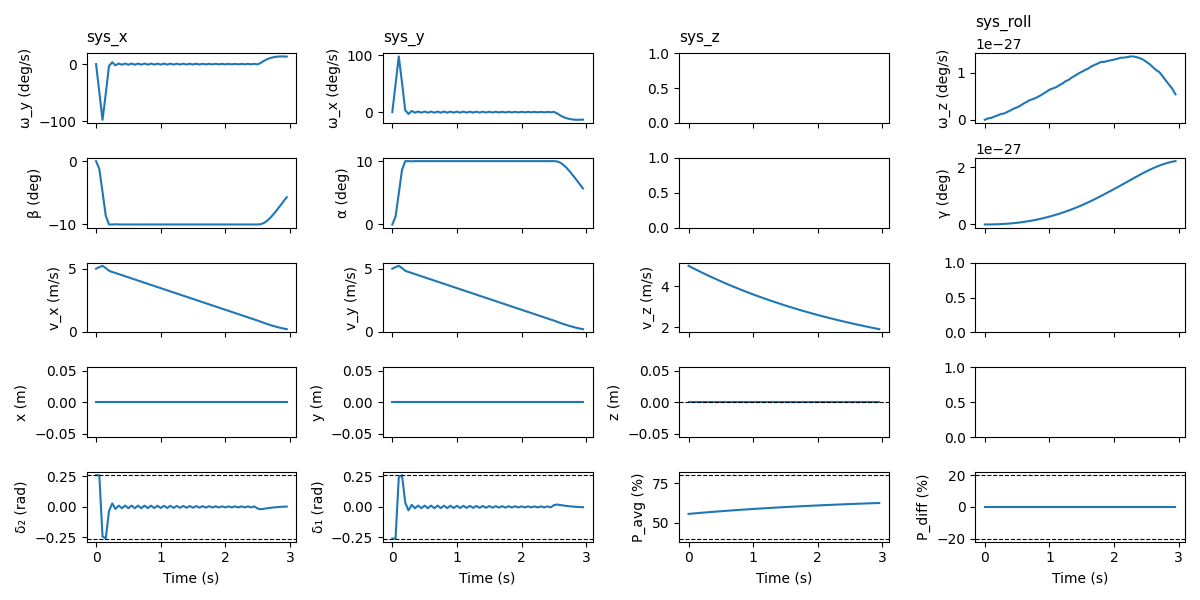

In [4]:
#--- x0 with vx=vy=vz= 5 m/s ---#

Ts = 0.05
sim_time = 7.0
H = 3.0 # MPC horizon in seconds
x0 = np.zeros(12)  # initial state
x0[6]=5
x0[7]=5
x0[8]=5

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_ol[:-1,0],x_ol[:,:-1,0],u_ol[:,:,0])


Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 25 iterations.
Simulating time 0.00: 

c:\Users\tomso\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

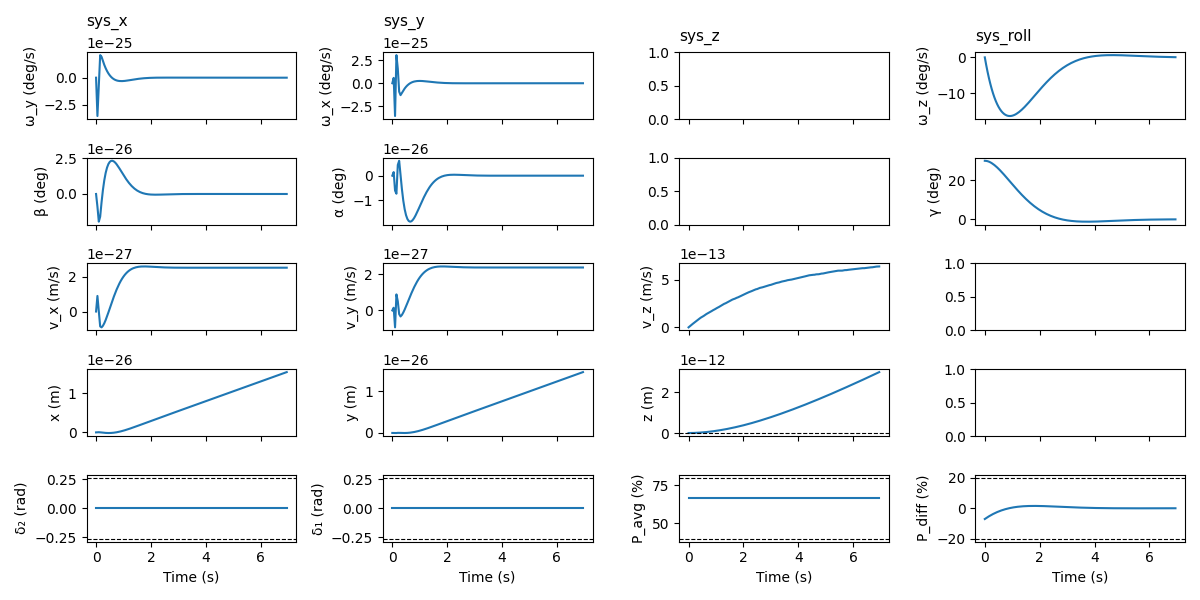

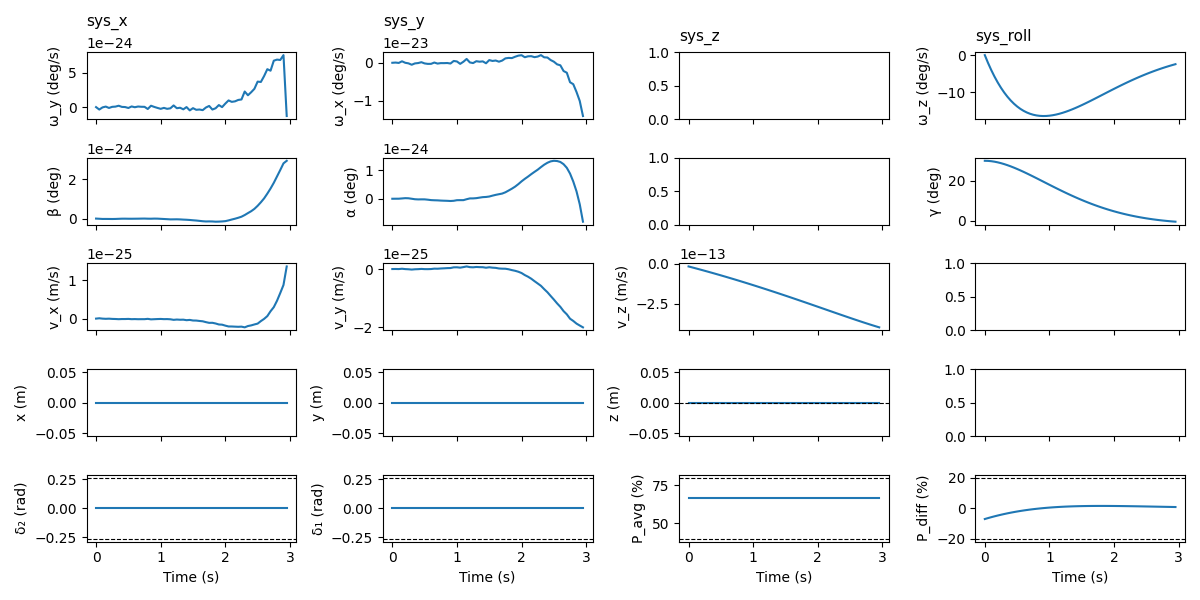

In [5]:
#--- For stationnary with roll at 30 deg ---#

Ts = 0.05
sim_time = 7.0
H = 3.0 # MPC horizon in seconds
x0 = np.zeros(12)  # initial state
x0[5]=30*np.pi/180

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_ol[:-1,0],x_ol[:,:-1,0],u_ol[:,:,0])

Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 25 iterations.


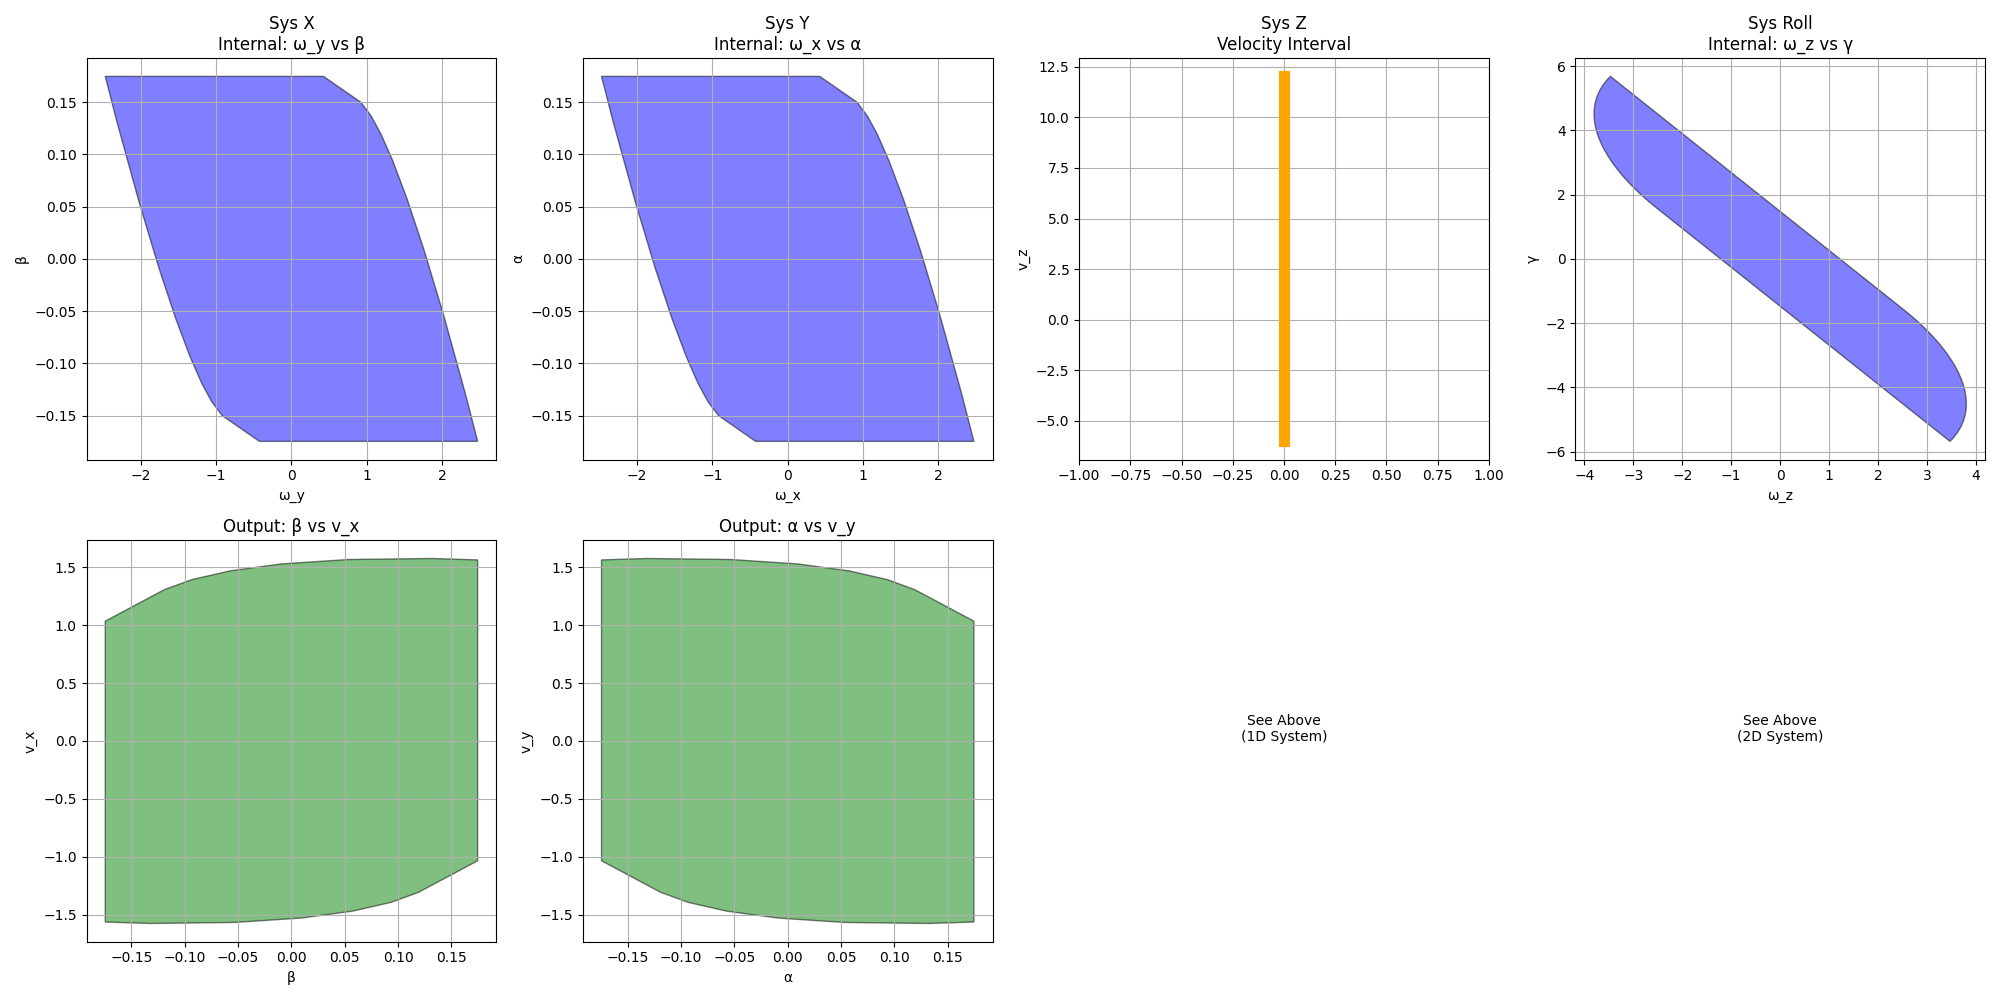

In [6]:
#--- Plots of maximum invariant sets ---#

Ts = 0.05
H = 3.0 # MPC horizon in seconds
x0 = np.zeros(12)  # initial state


rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)


import matplotlib.pyplot as plt
import numpy as np

# Liste des contrôleurs
controllers = [
    ('Sys X', mpc.mpc_x, ['ω_y', 'β', 'v_x']), 
    ('Sys Y', mpc.mpc_y, ['ω_x', 'α', 'v_y']), 
    ('Sys Z', mpc.mpc_z, ['v_z']), 
    ('Sys Roll', mpc.mpc_roll, ['ω_z', 'γ'])
]


fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (name, ctrl, labels) in enumerate(controllers):
    
    Xf = getattr(ctrl, 'X_f', getattr(ctrl, 'X_inf', None))
    
    if Xf is None:
        print(f"Pas de set pour {name}")
        continue
        
    dim = Xf.A.shape[1]
    
    
    ax_top = axes[0, i]
    try:
        if dim >= 2:
            
            Xf.projection(dims=(0, 1)).plot(ax=ax_top, color='blue', alpha=0.5)
            ax_top.set_xlabel(labels[0])
            ax_top.set_ylabel(labels[1])
            ax_top.set_title(f"{name}\nInternal: {labels[0]} vs {labels[1]}")
        else:
            
            A = Xf.A.flatten()
            b = Xf.b.flatten()
            
        
            upper_candidates = b[A > 1e-6] / A[A > 1e-6]
            max_v = np.min(upper_candidates) if len(upper_candidates) > 0 else 10.0
            
            
            lower_candidates = b[A < -1e-6] / A[A < -1e-6]
            min_v = np.max(lower_candidates) if len(lower_candidates) > 0 else -10.0
            
            
            ax_top.plot([0, 0], [min_v, max_v], linewidth=8, color='orange')
            ax_top.set_xlim(-1, 1) 
            ax_top.set_ylabel(labels[0])
            ax_top.set_title(f"{name}\nVelocity Interval")
            
    except Exception as e:
        print(f"Erreur Top {name}: {e}")
    ax_top.grid(True)

    
    ax_bot = axes[1, i]
    try:
        if dim > 2:
            
            Xf.projection(dims=(1, 2)).plot(ax=ax_bot, color='green', alpha=0.5)
            ax_bot.set_xlabel(labels[1])
            ax_bot.set_ylabel(labels[2])
            ax_bot.set_title(f"Output: {labels[1]} vs {labels[2]}")
            
        elif dim == 2:
            
            ax_bot.text(0.5, 0.5, "See Above\n(2D System)", ha='center')
            ax_bot.axis('off')
            
        else:
            
            ax_bot.text(0.5, 0.5, "See Above\n(1D System)", ha='center')
            ax_bot.axis('off')

    except Exception as e:
        print(f"Erreur Bot {name}: {e}")
    ax_bot.grid(True)

plt.tight_layout()
plt.show()

